In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [15]:
df= pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
df.shape

(768, 9)

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### Data Visualization

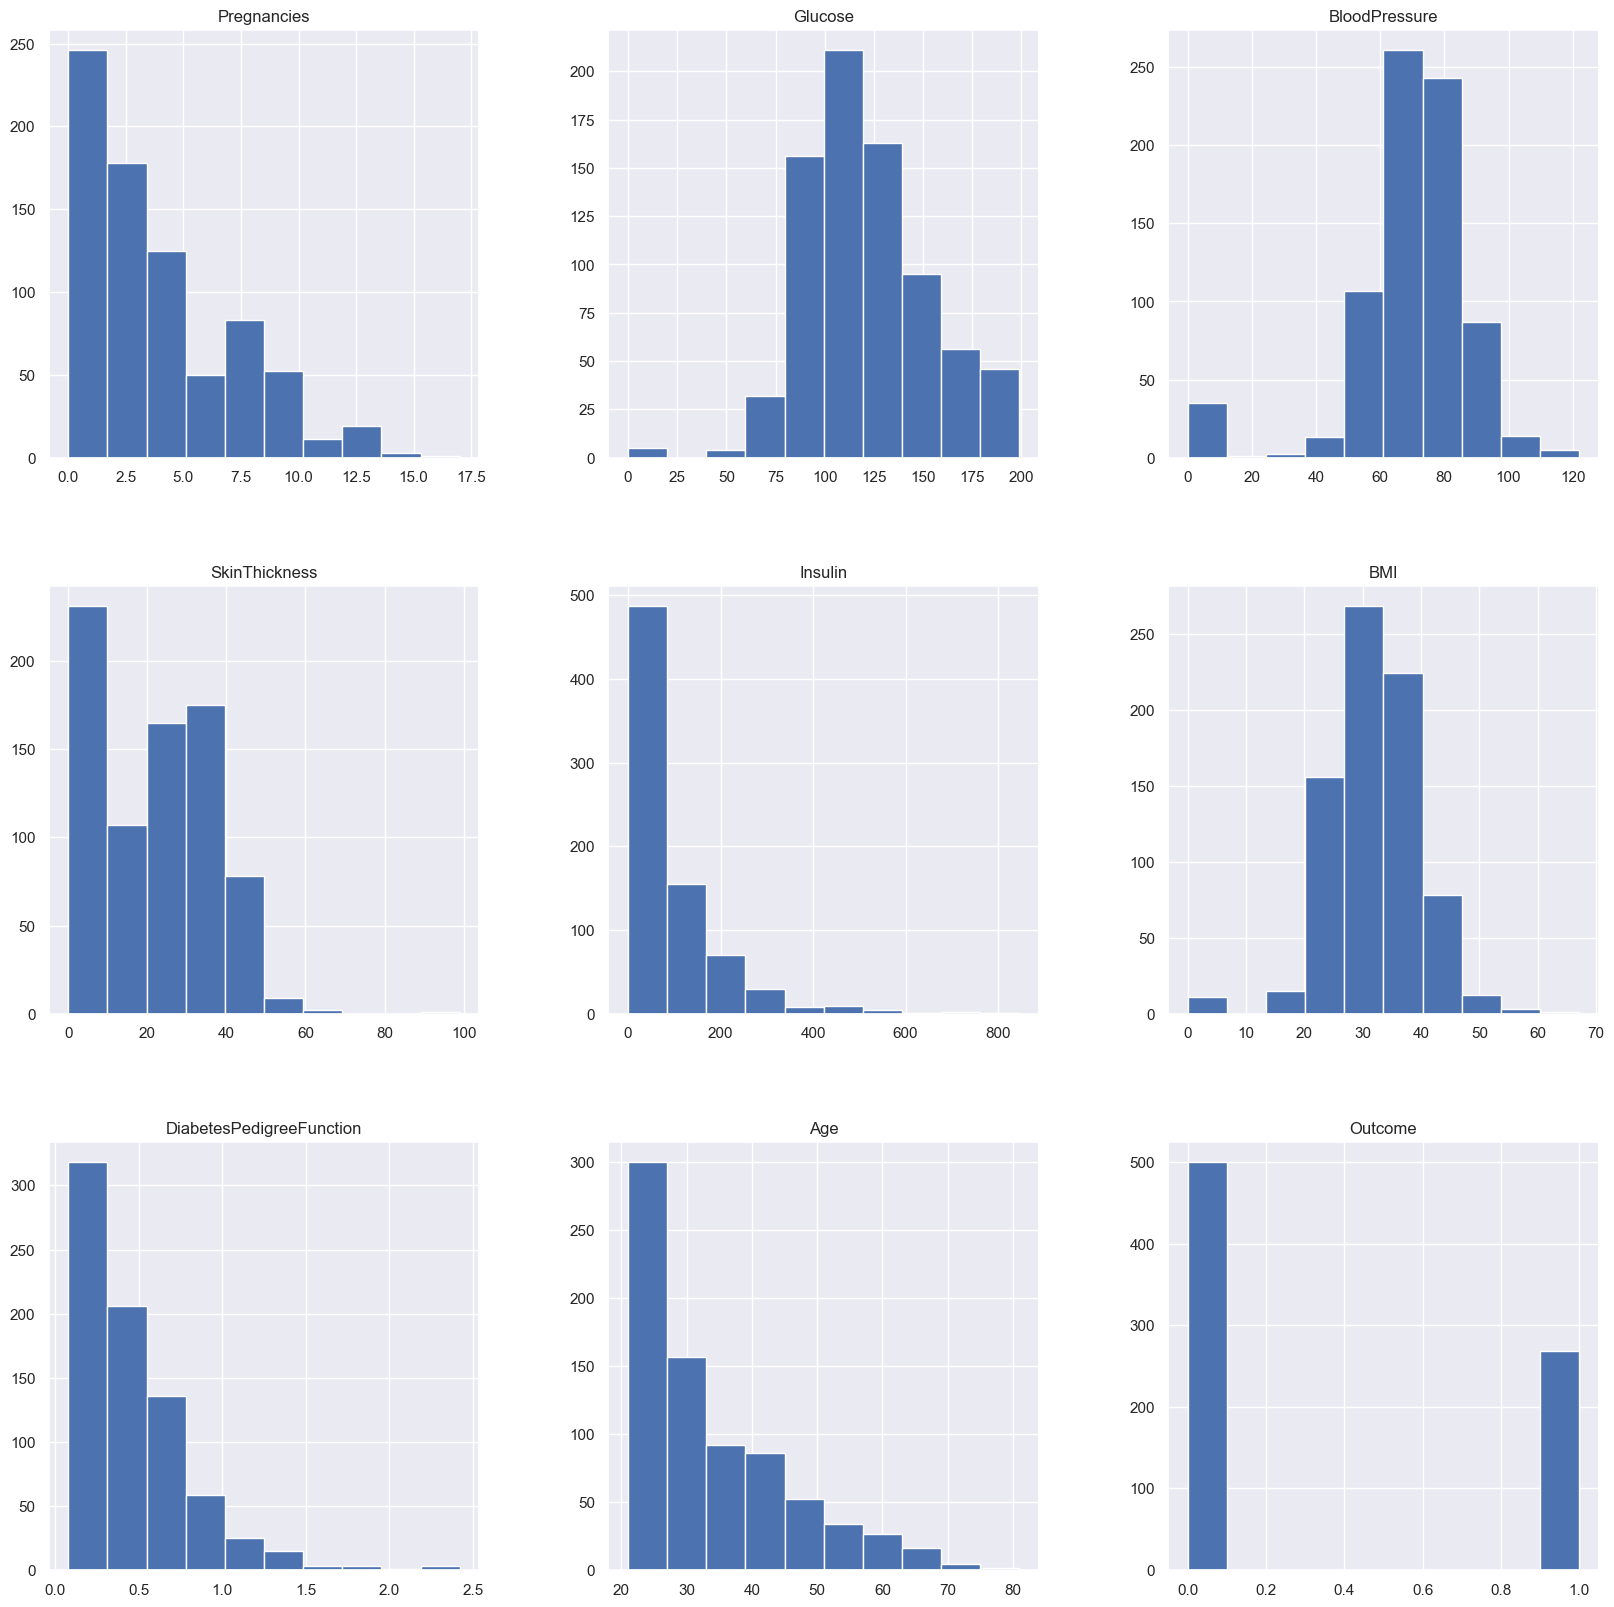

In [21]:
df.hist(figsize=(20,20))
plt.show()

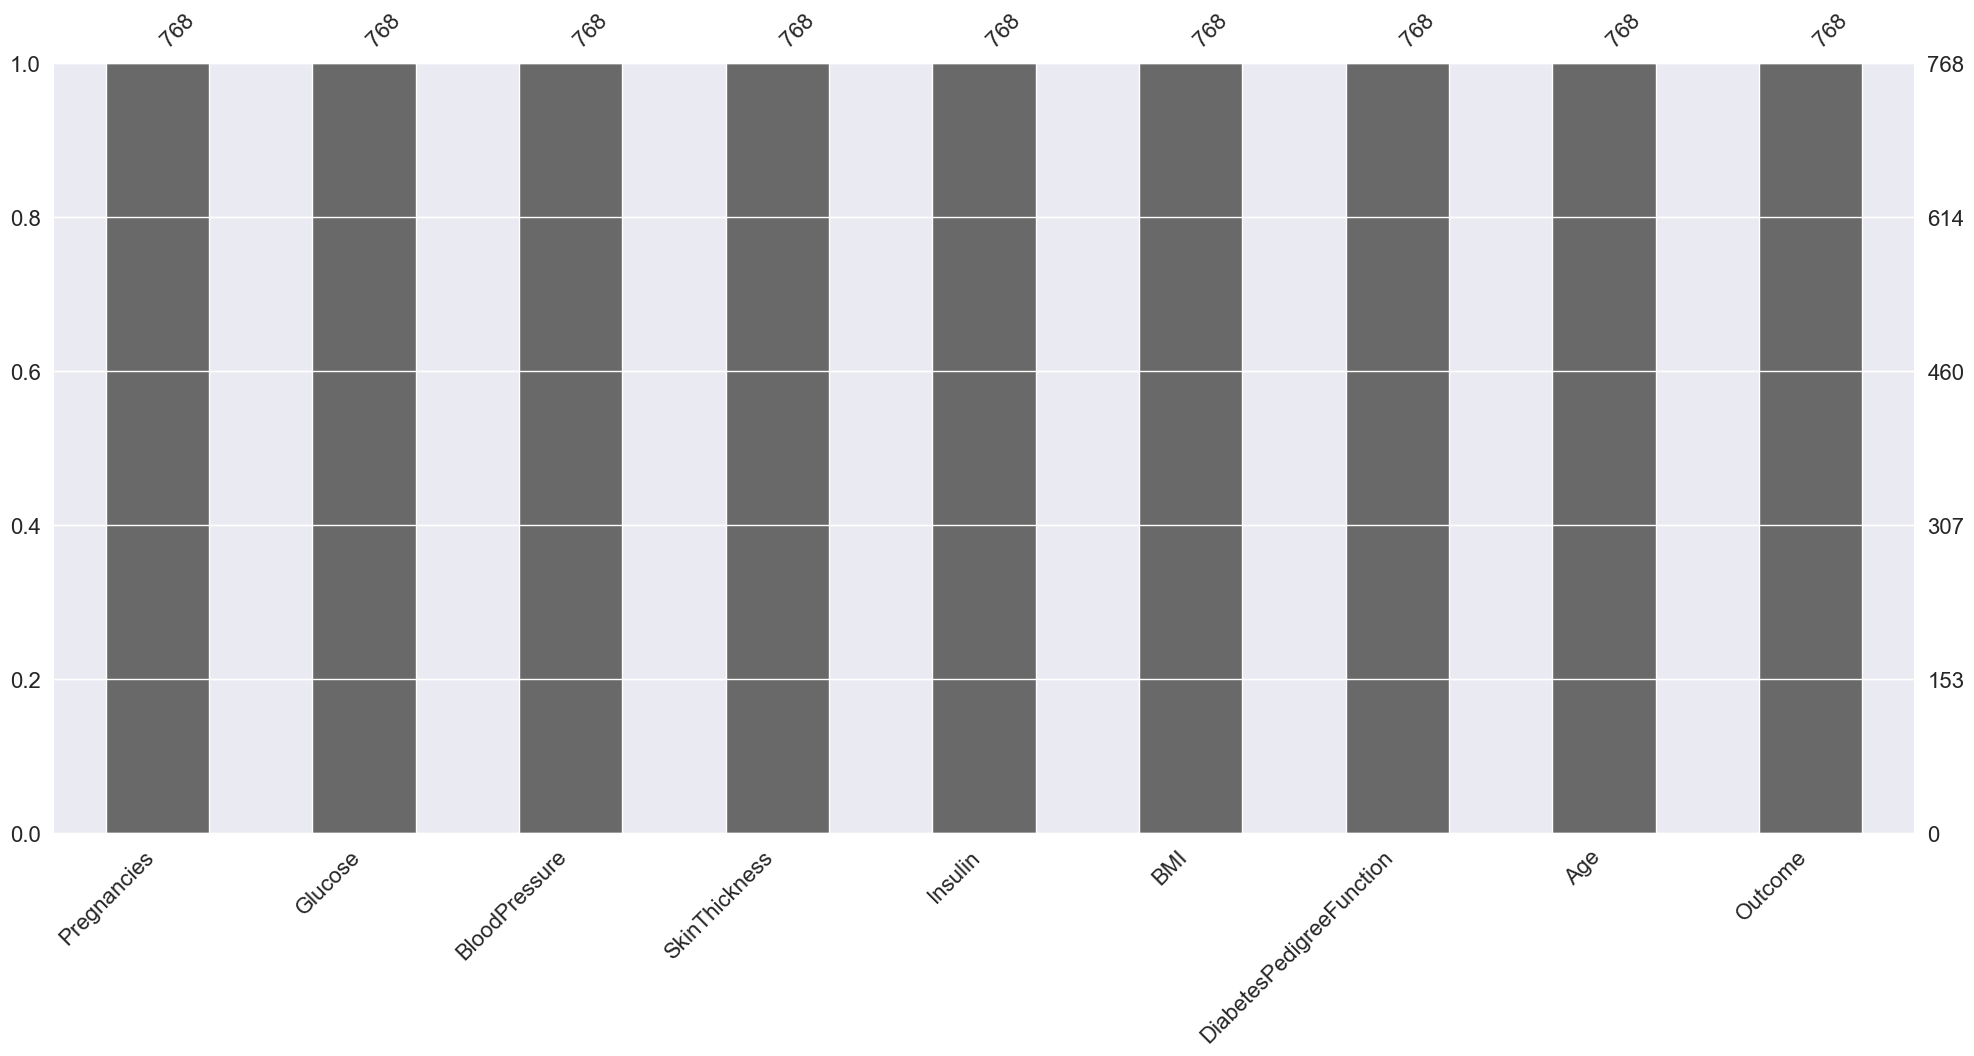

In [22]:
#To check and plot null values
import missingno as msno
msno.bar(df)
plt.show()

###### As we see there is no null values

In [23]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

###### plt.figure(figsize=(10,6))
sns.countplot(x=df['Outcome'])

In [25]:
target_count=df['Outcome'].value_counts()
nb_to_delete=target_count[0]-target_count[1]
df= df.sample(frac=1, random_state=30).sort_values(by='Outcome')
df=df[nb_to_delete:]
df['Outcome'].value_counts()


0    268
1    268
Name: Outcome, dtype: int64

###### Now our dataset is balanced

#### Correlation between all the features

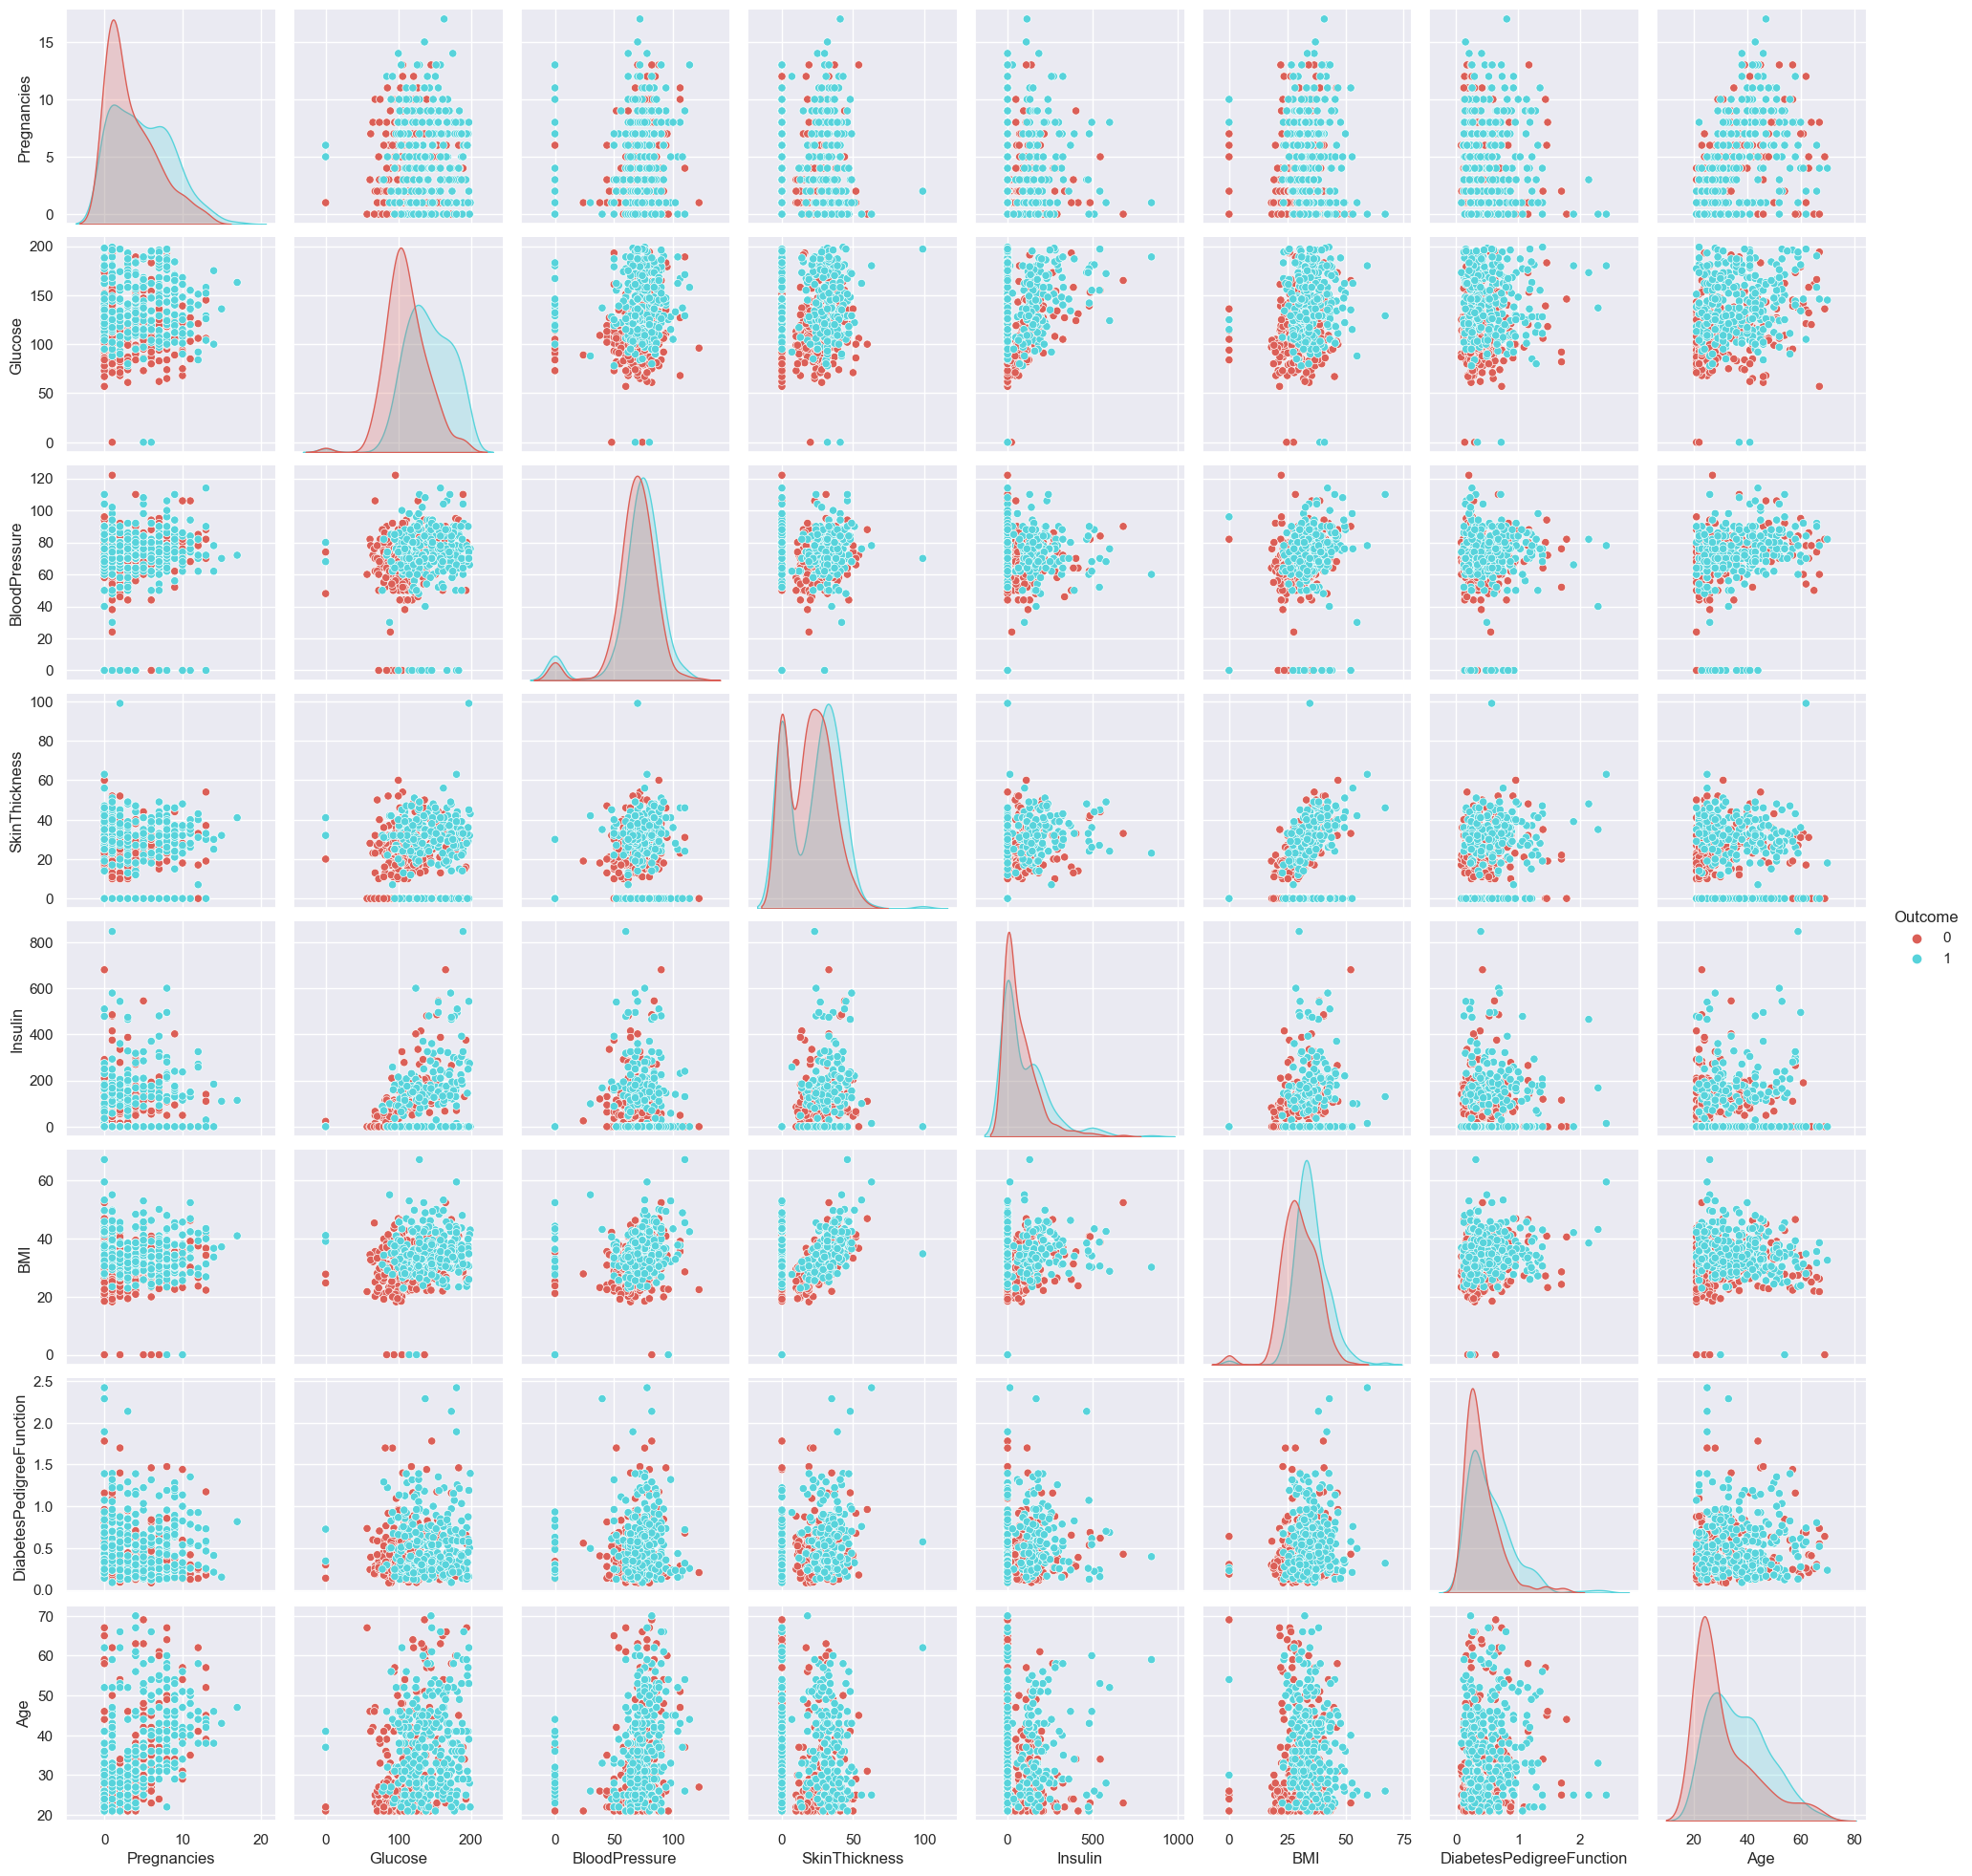

In [31]:
sns.pairplot(df, hue='Outcome', palette='hls')

<AxesSubplot:>

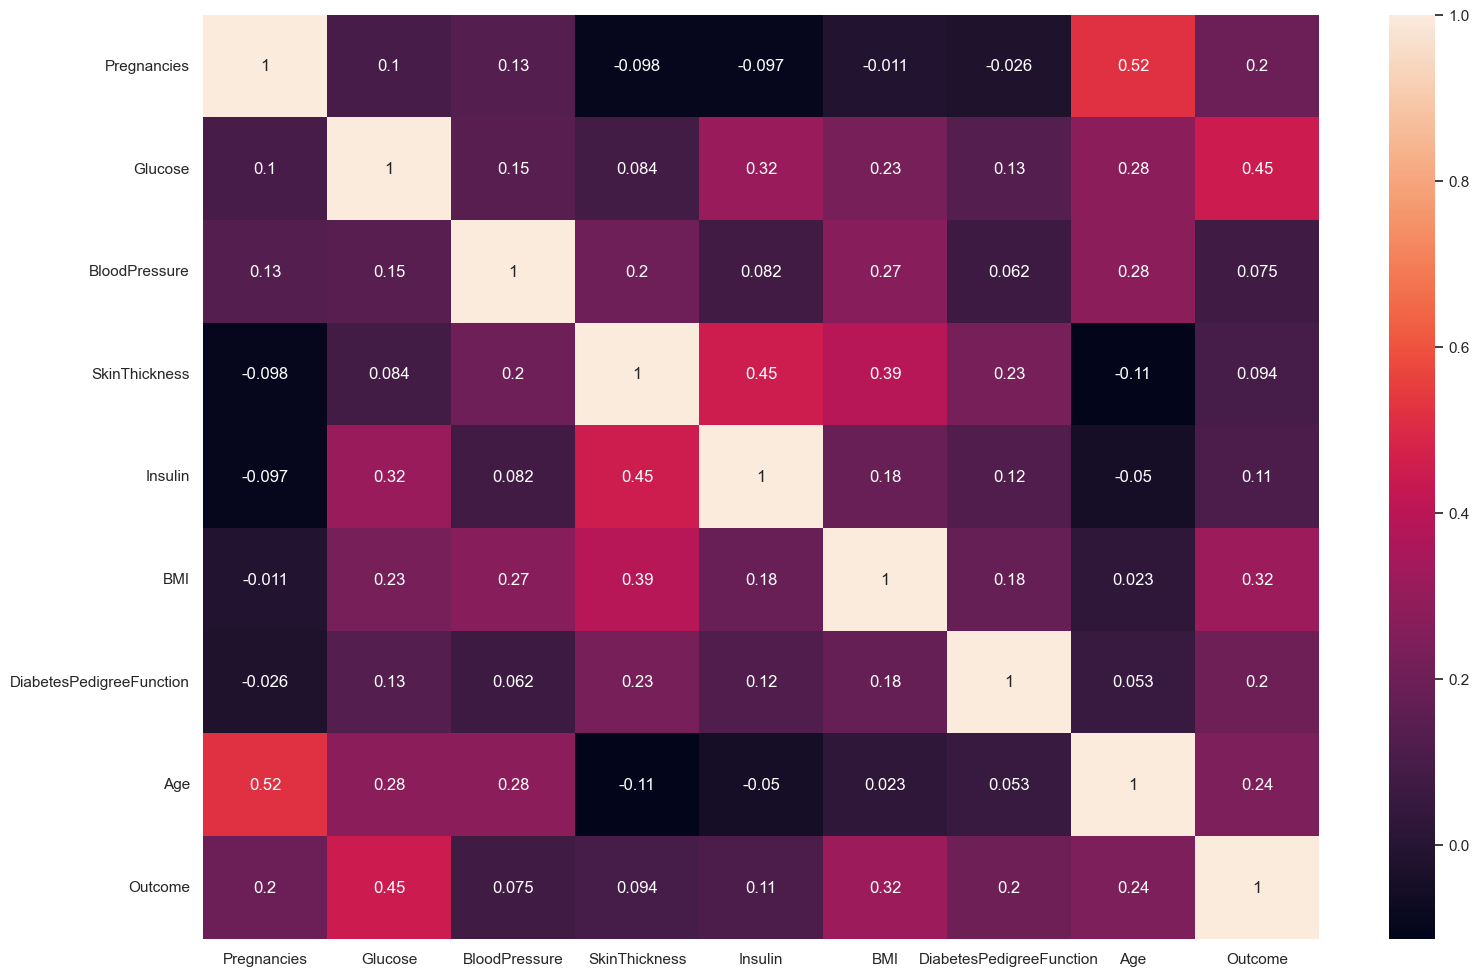

In [30]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)

In [33]:
X=df.drop('Outcome', axis='columns')
y= df.Outcome

#### Scaling the Data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#### Split data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=20)

##### Model Building

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


In [56]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [67]:
folds= StratifiedKFold(n_splits=3)

score_random_forest= []
score_decision_tree= []
score_svm= []
score_knn= []

for train_index, test_index in folds.split(X, y):
    X_train, X_test= X_scaled[train_index], X_scaled[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]
    score_random_forest.append(get_score(RandomForestClassifier(random_state=5), X_train, X_test, y_train, y_test))
    score_decision_tree.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    score_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))
    

In [68]:
print(score_random_forest)
print(score_decision_tree)
print(score_svm)
print(score_knn)

[0.7821229050279329, 0.7262569832402235, 0.7359550561797753]
[0.7150837988826816, 0.6368715083798883, 0.6741573033707865]
[0.7262569832402235, 0.7039106145251397, 0.7584269662921348]
[0.6983240223463687, 0.6536312849162011, 0.7415730337078652]


In [75]:
model=RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)
print("Accuracy score on test dataset : " , model.score(X_test, y_test))

Accuracy score on test dataset :  0.7359550561797753


### Model Evaluation

In [78]:
#Preddcition of first 10 features
y_pred= model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

<AxesSubplot:>

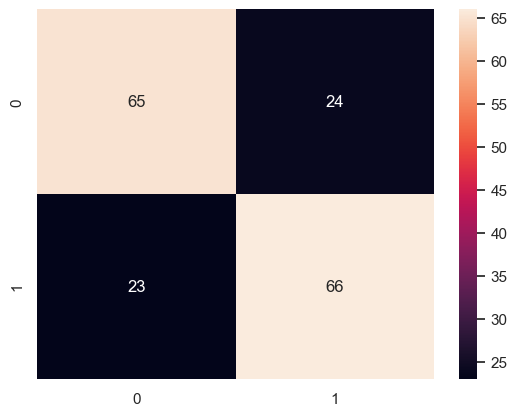

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73        89
           1       0.73      0.74      0.74        89

    accuracy                           0.74       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.74      0.74      0.74       178



#### The Conclusion from Model Building


In [82]:
model.feature_importances_

array([0.08542983, 0.23419892, 0.0873534 , 0.07934973, 0.06405268,
       0.18573538, 0.12602008, 0.13785998])

<AxesSubplot:>

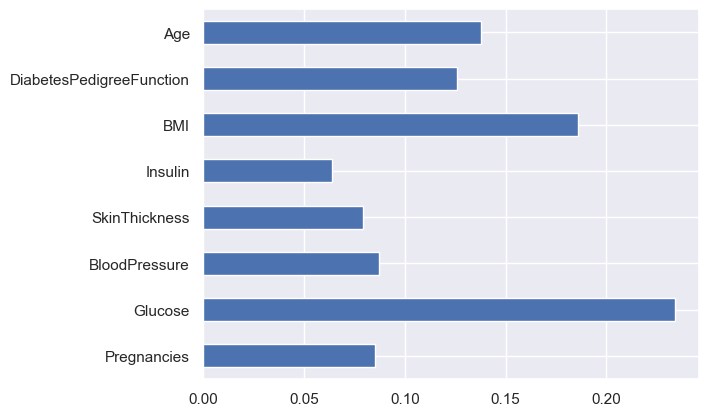

In [87]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh')

###### From the above graph, it is clearly visible that Glucose is the most important features to determine weither the person has diabete or not.

In [90]:
import pickle

with open("diabetes_model", 'wb') as f:
    pickle.dump(model,f)